# MLP(Multi Layer Perceptron) - Regression

In [40]:
import torch
import torch.nn as nn
import torch.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data_utils

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

### 1) Data

In [41]:
#데이터 판다스로 불러오기
df_raw = pd.read_csv("./BostonHousing.csv") #csv(comma-separated values)파일 가져오기(디럭토리 주소입력)
print(type(df_raw))


<class 'pandas.core.frame.DataFrame'>


In [42]:
print(df_raw.shape) # Dataset의 크기 확인
df_raw

(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [43]:
# X값 coulumn
x = df_raw.drop(["medv"], axis=1) #Target 값에 해당하는 집값('medv') 열을 삭제

# y값 column
y = df_raw["medv"]

print(x.shape)
print(y.shape)
print(type(y))

(506, 13)
(506,)
<class 'pandas.core.series.Series'>


In [44]:
#학습데이터와 테스트데이터를 일정비율로 나누기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1234)

#학습 데이터
print("x_train의 크기: ",x_train.shape)
print("y_train의 크기: ",y_train.shape,'\n')

#테스트 데이터 
print("x_test의 크기: ",x_test.shape)
print("y_test의 크기: ",y_test.shape)
print(type(y_train))

x_train의 크기:  (354, 13)
y_train의 크기:  (354,) 

x_test의 크기:  (152, 13)
y_test의 크기:  (152,)
<class 'pandas.core.series.Series'>


#### -Scailing

In [45]:
#학습 데이터 Scaling
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scale = scaler.transform(x_train) # x_train_scale은 numpy ndarray 


#테스트 데이터 Scaling
x_test_scale = scaler.transform(x_test) # x_test_scale은 numpy ndarray 


# Array-->Tensor
x_train_tensor = torch.FloatTensor(x_train_scale)
y_train_tensor = torch.FloatTensor(y_train.values) #y_train은 판다스 Series이므로 values를 사용해서 numpy ndarray로 가져오기

x_test_tensor = torch.FloatTensor(x_test_scale)
y_test_tensor = torch.FloatTensor(y_test.values)

##### -Batchfy

In [62]:

#학습 데이터 배치화 시키기 
train_data = data_utils.TensorDataset(x_train_tensor, y_train_tensor)

dataloader = data_utils.DataLoader(train_data, batch_size=354, shuffle=True , drop_last=True)


#배치화된 데이터 확인
for batch_idx, datas in enumerate(dataloader):
    print(batch_idx)
    print(datas[0].shape)  # x_train 
    print(datas[1].shape) # y_train
    break


0
torch.Size([354, 13])
torch.Size([354])


### 2) Model

In [63]:
# Modeling
class MLP_model(torch.nn.Module):
        def __init__(self, input_size, hidden_size ,output_size):
            super(MLP_model, self).__init__()
            self.input_size = input_size
            self.hidden_size = hidden_size
            self.output_size = output_size
            self.hidden2 = 16
            
            self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.fc2 = torch.nn.Linear(self.hidden_size, self.hidden2)
            self.fc3 = torch.nn.Linear(self.hidden2, self.output_size)
            self.relu = torch.nn.ReLU()
            self.sig = torch.nn.Sigmoid()
            
        def forward(self, x):
            fc1 = self.fc1(x)
            ac1 = self.relu(fc1)
            fc2 = self.fc2(ac1)
            ac2 = self.relu(fc2)
            fc3 = self.fc3(ac2)
            
            return fc3

In [64]:
#Parameter 정의
input_dim = 13
output_dim = 1
hidden_dim = 32
learning_rate = 0.001
n_epochs = 700

In [65]:
#model 생성
model = MLP_model(input_size = input_dim, hidden_size = hidden_dim, output_size = output_dim)

In [66]:
#손실함수 생성
criterion = torch.nn.MSELoss()
#Optimizer 생성
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### 3) Training

In [67]:
# Training the model
train_loss = []
test_loss = []

for epoch in range(n_epochs+1):
    
    #Batch 학습
    for idx, (x_batch, y_batch) in enumerate(dataloader):
        optimizer.zero_grad()
        y_pred = model(x_batch)
        y_pred = y_pred.reshape(-1)
        loss_train = criterion(y_pred, y_batch)
        loss_train.backward()
        optimizer.step()
        
        #Validation
        y_test_pred = model(x_test_tensor)
        y_test_pred = y_test_pred.reshape(-1)
        loss_test = criterion(y_test_pred, y_test_tensor)

    train_loss.append(loss_train.item())
    test_loss.append(loss_test.item())
    print("epoch:{}, Loss_train:{:.2f}, Loss_test:{:.2f}".format( epoch, train_loss[-1], test_loss[-1]))

epoch:0, Loss_train:587.08, Loss_test:600.75
epoch:1, Loss_train:583.46, Loss_test:596.84
epoch:2, Loss_train:579.65, Loss_test:592.66
epoch:3, Loss_train:575.60, Loss_test:588.18
epoch:4, Loss_train:571.26, Loss_test:583.34
epoch:5, Loss_train:566.57, Loss_test:578.05
epoch:6, Loss_train:561.45, Loss_test:572.20
epoch:7, Loss_train:555.80, Loss_test:565.71
epoch:8, Loss_train:549.52, Loss_test:558.41
epoch:9, Loss_train:542.48, Loss_test:550.16
epoch:10, Loss_train:534.53, Loss_test:540.75
epoch:11, Loss_train:525.49, Loss_test:529.94
epoch:12, Loss_train:515.12, Loss_test:517.45
epoch:13, Loss_train:503.15, Loss_test:502.94
epoch:14, Loss_train:489.27, Loss_test:486.00
epoch:15, Loss_train:473.08, Loss_test:466.15
epoch:16, Loss_train:454.11, Loss_test:442.85
epoch:17, Loss_train:431.86, Loss_test:415.63
epoch:18, Loss_train:405.87, Loss_test:384.12
epoch:19, Loss_train:375.78, Loss_test:348.30
epoch:20, Loss_train:341.49, Loss_test:308.67
epoch:21, Loss_train:303.37, Loss_test:266.5

epoch:190, Loss_train:13.83, Loss_test:13.93
epoch:191, Loss_train:13.81, Loss_test:13.91
epoch:192, Loss_train:13.78, Loss_test:13.90
epoch:193, Loss_train:13.76, Loss_test:13.88
epoch:194, Loss_train:13.74, Loss_test:13.86
epoch:195, Loss_train:13.71, Loss_test:13.84
epoch:196, Loss_train:13.69, Loss_test:13.83
epoch:197, Loss_train:13.67, Loss_test:13.81
epoch:198, Loss_train:13.65, Loss_test:13.80
epoch:199, Loss_train:13.63, Loss_test:13.78
epoch:200, Loss_train:13.60, Loss_test:13.77
epoch:201, Loss_train:13.58, Loss_test:13.75
epoch:202, Loss_train:13.56, Loss_test:13.74
epoch:203, Loss_train:13.54, Loss_test:13.72
epoch:204, Loss_train:13.52, Loss_test:13.71
epoch:205, Loss_train:13.50, Loss_test:13.69
epoch:206, Loss_train:13.48, Loss_test:13.68
epoch:207, Loss_train:13.46, Loss_test:13.66
epoch:208, Loss_train:13.44, Loss_test:13.65
epoch:209, Loss_train:13.42, Loss_test:13.63
epoch:210, Loss_train:13.40, Loss_test:13.62
epoch:211, Loss_train:13.38, Loss_test:13.60
epoch:212,

epoch:375, Loss_train:11.19, Loss_test:11.99
epoch:376, Loss_train:11.18, Loss_test:11.99
epoch:377, Loss_train:11.17, Loss_test:11.98
epoch:378, Loss_train:11.16, Loss_test:11.97
epoch:379, Loss_train:11.15, Loss_test:11.97
epoch:380, Loss_train:11.14, Loss_test:11.96
epoch:381, Loss_train:11.13, Loss_test:11.96
epoch:382, Loss_train:11.12, Loss_test:11.95
epoch:383, Loss_train:11.11, Loss_test:11.95
epoch:384, Loss_train:11.10, Loss_test:11.94
epoch:385, Loss_train:11.10, Loss_test:11.94
epoch:386, Loss_train:11.09, Loss_test:11.93
epoch:387, Loss_train:11.08, Loss_test:11.93
epoch:388, Loss_train:11.07, Loss_test:11.92
epoch:389, Loss_train:11.06, Loss_test:11.92
epoch:390, Loss_train:11.05, Loss_test:11.91
epoch:391, Loss_train:11.04, Loss_test:11.91
epoch:392, Loss_train:11.03, Loss_test:11.90
epoch:393, Loss_train:11.02, Loss_test:11.90
epoch:394, Loss_train:11.01, Loss_test:11.89
epoch:395, Loss_train:11.00, Loss_test:11.89
epoch:396, Loss_train:10.99, Loss_test:11.88
epoch:397,

epoch:558, Loss_train:9.79, Loss_test:11.35
epoch:559, Loss_train:9.78, Loss_test:11.35
epoch:560, Loss_train:9.77, Loss_test:11.35
epoch:561, Loss_train:9.77, Loss_test:11.35
epoch:562, Loss_train:9.76, Loss_test:11.34
epoch:563, Loss_train:9.76, Loss_test:11.34
epoch:564, Loss_train:9.75, Loss_test:11.34
epoch:565, Loss_train:9.75, Loss_test:11.33
epoch:566, Loss_train:9.74, Loss_test:11.33
epoch:567, Loss_train:9.74, Loss_test:11.33
epoch:568, Loss_train:9.73, Loss_test:11.32
epoch:569, Loss_train:9.73, Loss_test:11.32
epoch:570, Loss_train:9.72, Loss_test:11.32
epoch:571, Loss_train:9.72, Loss_test:11.32
epoch:572, Loss_train:9.71, Loss_test:11.31
epoch:573, Loss_train:9.71, Loss_test:11.31
epoch:574, Loss_train:9.70, Loss_test:11.31
epoch:575, Loss_train:9.70, Loss_test:11.30
epoch:576, Loss_train:9.69, Loss_test:11.30
epoch:577, Loss_train:9.69, Loss_test:11.30
epoch:578, Loss_train:9.68, Loss_test:11.30
epoch:579, Loss_train:9.68, Loss_test:11.29
epoch:580, Loss_train:9.67, Loss

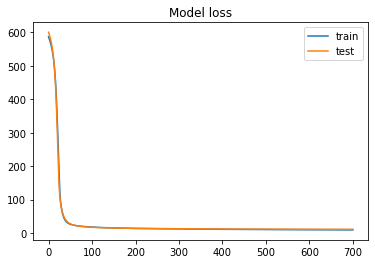

In [68]:
# Loss 값 plot
plt.figure()
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.title('Model loss')
plt.legend(loc= 'upper right')
plt.show()

### <Scaling>